In [1]:
import matplotlib.pyplot as plt
import numpy as np
from multi_system_heuristic import D_funcs, P_funcs, dP_dp_funcs, heuristic_search


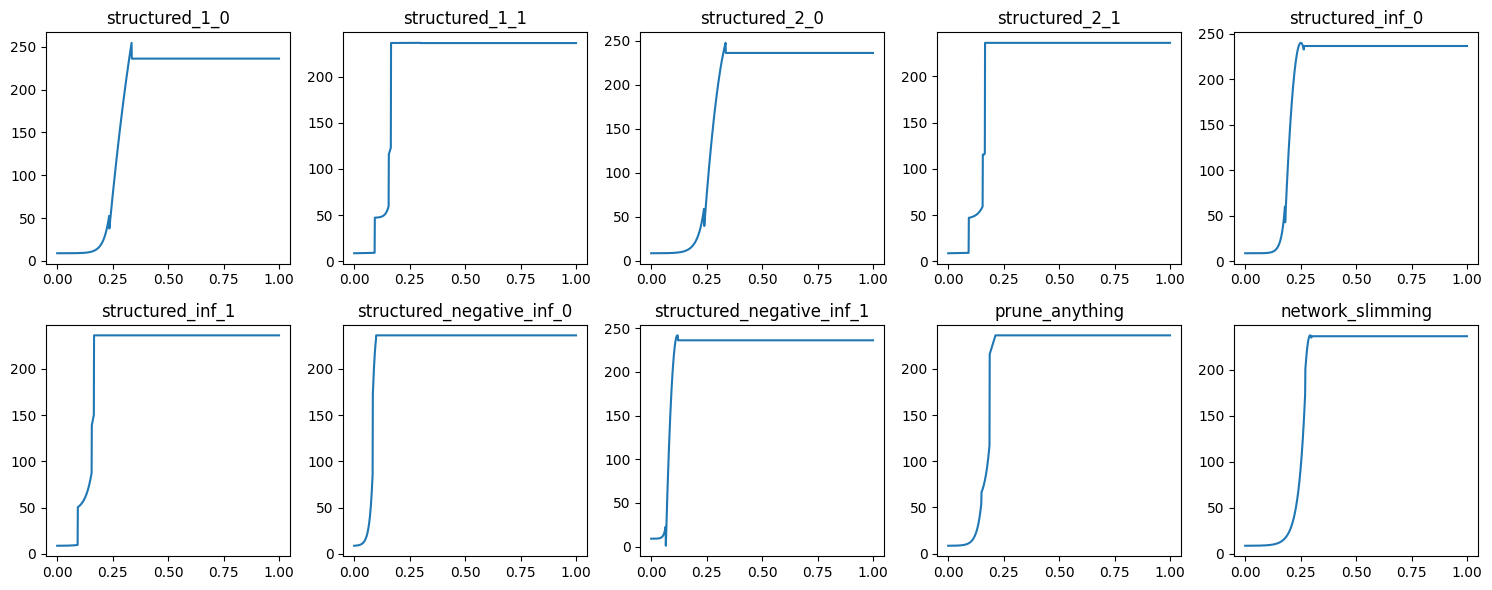

In [3]:
p = np.linspace(0, 1, 1000)

n_funcs = len(D_funcs)
ncols = 5
nrows = (n_funcs + ncols - 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 6))
axes = axes.flatten()

for ax, key in zip(axes, D_funcs):
    F = D_funcs[key]
    vec_F = np.vectorize(F)
    ax.plot(p, vec_F(p))
    ax.set_title(key)

# remove any unused subplots
for ax in axes[n_funcs:]:
    ax.remove()

plt.tight_layout()
plt.show()

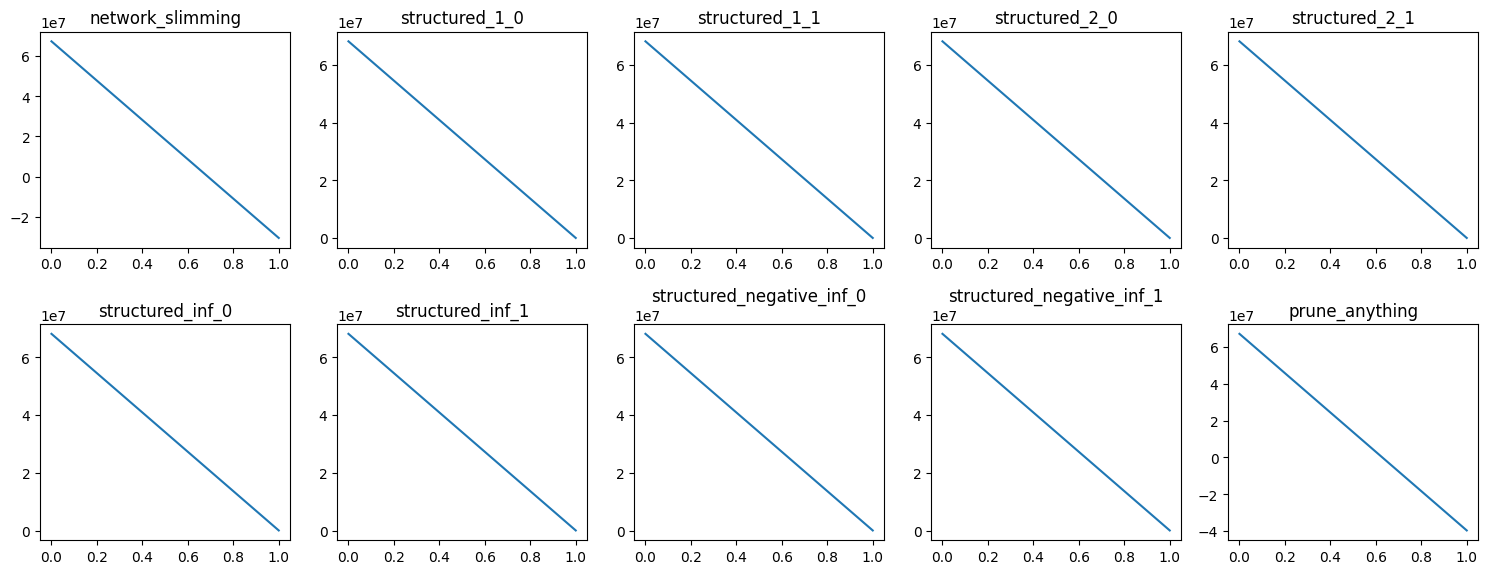

In [4]:
n_funcs_P = len(P_funcs)
ncols = 5
nrows = (n_funcs_P + ncols - 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 6))
axes = axes.flatten()

for ax, key in zip(axes, P_funcs):
    func = P_funcs[key]
    vec_func = np.vectorize(func)
    ax.plot(p, vec_func(p))
    ax.set_title(key)

# Remove any unused subplots
for ax in axes[n_funcs_P:]:
    ax.remove()

plt.tight_layout()
plt.show()

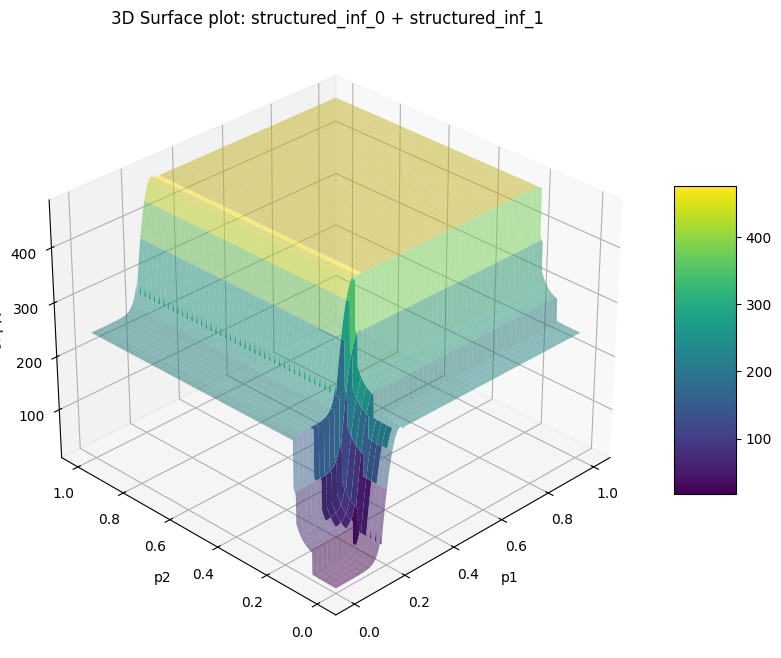

In [32]:
# Randomly select two distinct functions from D_funcs.
key1, key2 = np.random.default_rng(seed=1).choice(list(D_funcs.keys()), 2)
D1 = D_funcs[key1]
P1 = P_funcs[key1]
D2 = D_funcs[key2]
P2 = P_funcs[key2]

size = 12 * 1e7
t1 = 225
t2 = 200

# Create independent variables.
p1_lin = np.linspace(0, 1, 1000)
p2_lin = np.linspace(0, 1, 1000)
p1, p2 = np.meshgrid(p1_lin, p2_lin)

# Compute the dependent variable.
Z1 = np.vectorize(D1)(p1)
Z2 = np.vectorize(D2)(p2)
Z = Z1 + Z2
P = np.vectorize(P1)(p1) + np.vectorize(P2)(p2)

mask = (P < size) & (Z1 < t1) & (Z2 < t2)

cmap = plt.cm.viridis
norm = plt.Normalize(Z.min(), Z.max())
# Compute RGBA colors for each point based on Z
colors = cmap(norm(Z))
# Set the alpha channel: normal opacity (1.0) when P < size, and 0.7 otherwise.
colors[..., -1] = np.where(mask, 1.0, 0.5)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=30, azim=225)
surf = ax.plot_surface(p1, p2, Z, facecolors=colors, edgecolor='none')

# Add a colorbar based on Z values
mappable = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
mappable.set_array(Z)
fig.colorbar(mappable, ax=ax, shrink=0.5, aspect=5)

ax.set_title(f'3D Surface plot: {key1} + {key2}')
ax.set_xlabel('p1')
ax.set_ylabel('p2')
ax.set_zlabel('Value')
plt.show()

# # Create a 3D surface plot.
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')
# ax.view_init(elev=30, azim=225)
# surf = ax.plot_surface(p1, p2, Z, cmap='viridis', edgecolor='none')

# fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
# ax.set_title(f'3D Surface plot: {key1} + {key2}')
# ax.set_xlabel('p1')
# ax.set_ylabel('p2')
# ax.set_zlabel('Value')
# plt.show()